In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

# %matplotlib notebook

data_path = "../../../data/"
derrom_path = "../../"

import sys

# sys.path.append(derrom_path)
sys.path.insert(0,derrom_path)

import ELPH
import ELPH_utils
import derrom


## Paper Example Trajectory:

In [2]:
#system parameters
kmax = 2.
n_kmax = 40

system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)

In [3]:
init = system.get_init_cond_gauss(max_pos = 0.5/4, width = 0.025/4, density=0.05/4)

In [4]:
trajectory = system.get_full_trajectory(init, tmax = 2000.0, n_tmax = 400)

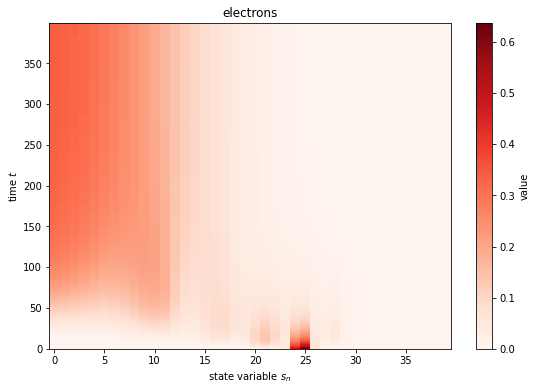

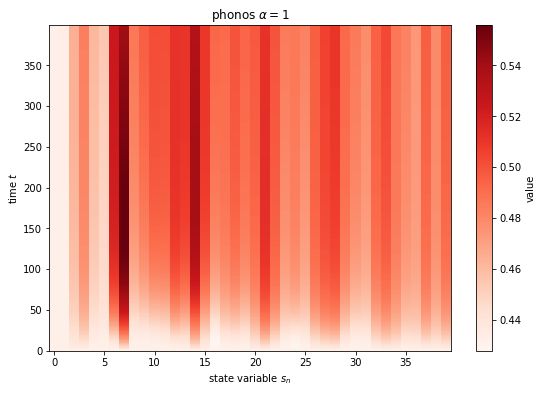

In [5]:
derrom.utils.plot_trajectory(trajectory[:,:system.n_kmax], 'electrons')

alpha = 0
derrom.utils.plot_trajectory(trajectory[:,system.n_kmax*(1+alpha):system.n_kmax*(2+alpha)],r'phonos $\alpha=$'+str(alpha+1))

In [6]:
el_trajectory = system.get_electron_trajectory(init, tmax = 2000.0, n_tmax = 400)

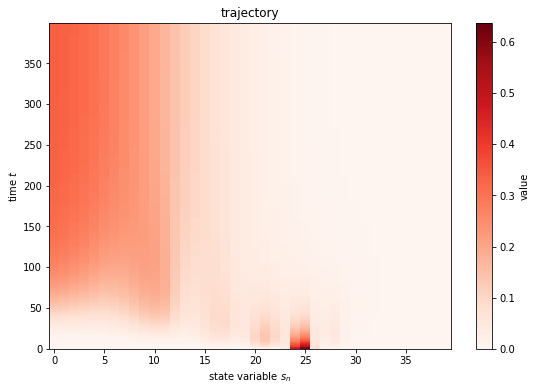

In [7]:
derrom.utils.plot_trajectory(el_trajectory)

In [8]:
ELPH_utils.save_trajectories([el_trajectory], filename=data_path+'ELPH_example_trajectory_nkmax40')

## Paper training and testing data set:


In [9]:
# system parameters
kmax = 2.
n_kmax = 40

system = ELPH.ELPH(kmax=kmax,n_kmax=n_kmax)

n_runs = 100

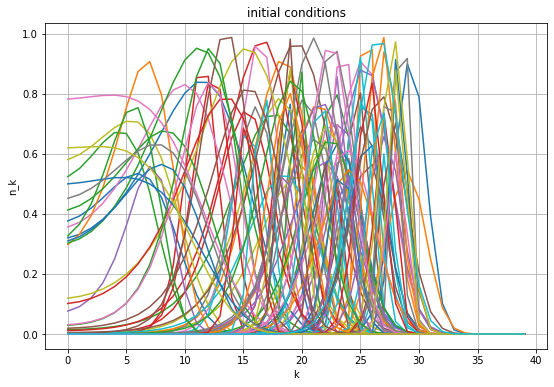

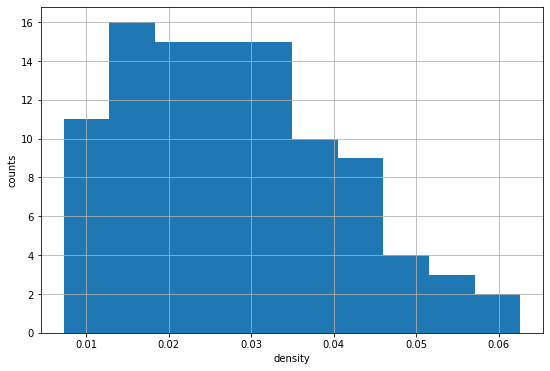

In [10]:
rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0/4, high=0.7/4, size=n_runs)
paras[:,1] = rng.uniform(low=0.02/4, high=0.1/4, size=n_runs)
paras[:,2] = 0.1/4

inits = ELPH_utils.get_gaussian_inits(system, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = system.get_electron_density(inits[r][:n_kmax])

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [11]:
trajectory_list = []

for j in range(len(inits)):
    print('run ', j+1)
    trajectory_list.append(system.get_electron_trajectory(inits[j], tmax = 2000.0, n_tmax = 400))
    
    

run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99
run  100


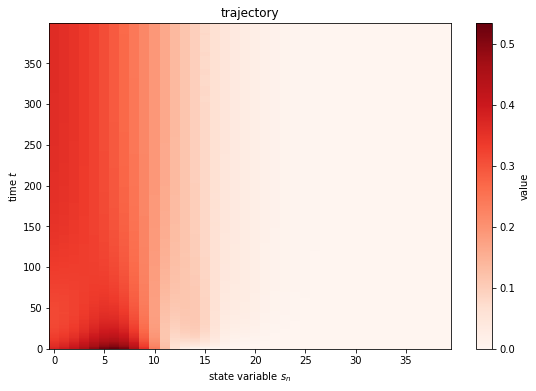

In [12]:
ind = 0

derrom.utils.plot_trajectory(trajectory_list[ind])

plt.show()

In [13]:
ELPH_utils.save_trajectories(trajectory_list, filename=data_path+'ELPH_trajectories_n_kmax=40')